season
봄     1473
여름    1354
가을    1305
겨울    1548
Name: 발생횟수, dtype: int64


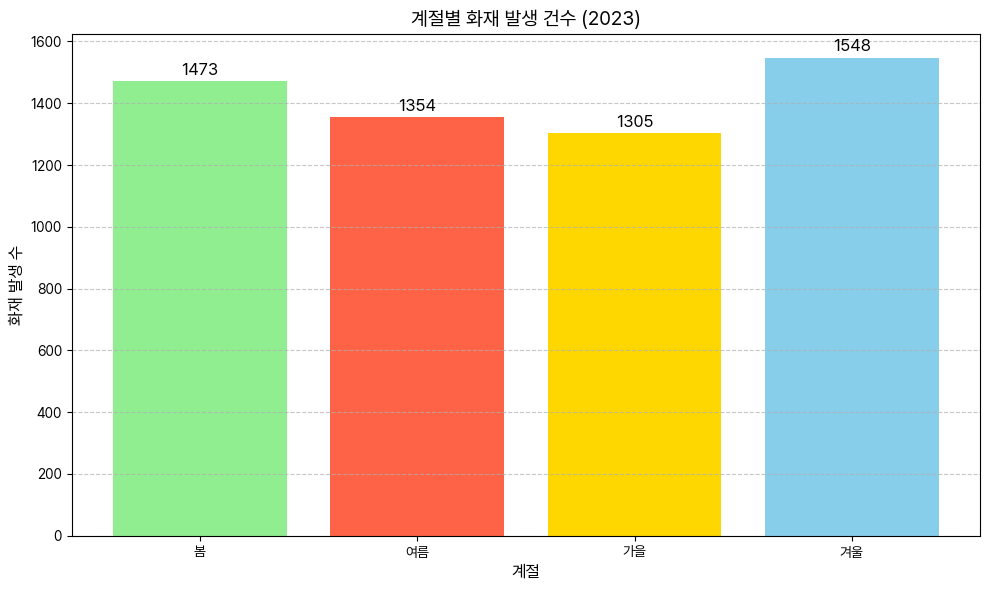

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False
# 1. 데이터 불러오기
file_path = './filtered_data/2023_일별_화재건수.csv'
df_fire = pd.read_csv(file_path)

# 2. 데이터 전처리
# 날짜 컬럼을 문자열로 변환 후 datetime 형식으로 변경
df_fire['날짜'] = df_fire['날짜'].astype(str)
df_fire['date'] = pd.to_datetime(df_fire['날짜'], format='%Y%m%d')

# 월(month) 추출
df_fire['month'] = df_fire['date'].dt.month

# 계절 매핑 함수 정의 (3~5월: 봄, 6~8월: 여름, 9~11월: 가을, 12~2월: 겨울)
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 계절 컬럼 생성
df_fire['season'] = df_fire['month'].apply(get_season)

# 3. 계절별 화재 건수 집계
season_counts = df_fire.groupby('season')['발생횟수'].sum()

# 계절 순서 정렬 (봄 -> 여름 -> 가을 -> 겨울)
season_order = ['봄', '여름', '가을', '겨울']
season_counts = season_counts.reindex(season_order)

# 결과 출력
print(season_counts)

# 4. 시각화
plt.figure(figsize=(10, 6))

# 색상 설정 (봄: 연두, 여름: 토마토, 가을: 골드, 겨울: 하늘색)
colors = ['#90EE90', '#FF6347', '#FFD700', '#87CEEB']
bars = plt.bar(season_counts.index, season_counts.values, color=colors)

plt.xlabel('계절', fontsize=12)
plt.ylabel('화재 발생 수', fontsize=12)
plt.title('계절별 화재 발생 건수 (2023)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, 
             f'{int(height)}', 
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig('./results/fire_counts_by_season.png')
plt.show()